<a href="https://colab.research.google.com/github/nikitansg/Forest-Fire-Prediction/blob/main/Forestfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/forestfires.csv')

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [ ]:
df.shape

(517, 13)

Data Preparation and Cleaning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [ ]:
# Using describe function for numerical values
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
#Using describe function for categorical values
df.describe(include='object')

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [ ]:
df.describe(include='object').columns

Index(['month', 'day'], dtype='object')

In [ ]:
df['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
df['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [ ]:
df.describe(include=["int", "float"])

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df.describe(include=["int", "float"]).columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area'],
      dtype='object')

In [ ]:
df['area_km'] = df['area'] / 100
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.0644
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.5429
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.1116
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X        517 non-null    int64  
 1   Y        517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   FFMC     517 non-null    float64
 5   DMC      517 non-null    float64
 6   DC       517 non-null    float64
 7   ISI      517 non-null    float64
 8   temp     517 non-null    float64
 9   RH       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
 13  area_km  517 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 56.7+ KB


In [ ]:
df.isna().sum()

X          0
Y          0
month      0
day        0
FFMC       0
DMC        0
DC         0
ISI        0
temp       0
RH         0
wind       0
rain       0
area       0
area_km    0
dtype: int64

Exploratory Data Analysis and Visualization

In [ ]:
#Highest area
df.sort_values(by="area_km", ascending=False).head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,10.9084
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,7.4628
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,2.7853
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,2.1288
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,2.0094


In [ ]:
highest_fire_area = df.sort_values(by="area_km", ascending=True)

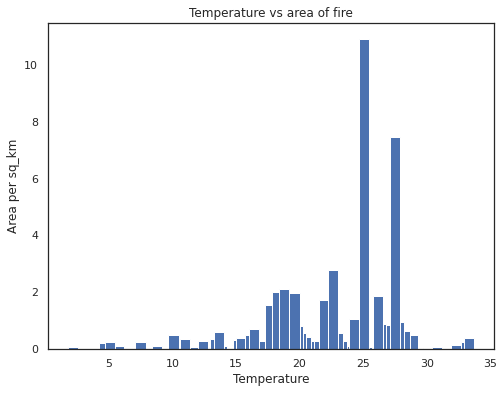

In [ ]:
plt.figure(figsize=(8, 6))

plt.title("Temperature vs area of fire" )
plt.bar(highest_fire_area['temp'], highest_fire_area['area_km'])

plt.xlabel("Temperature")
plt.ylabel("Area per sq_km")
plt.show()

In [ ]:
categorical_feature = df.describe(include=['O']).columns
numerical_feature = df.describe(include=["int", "float"]).columns

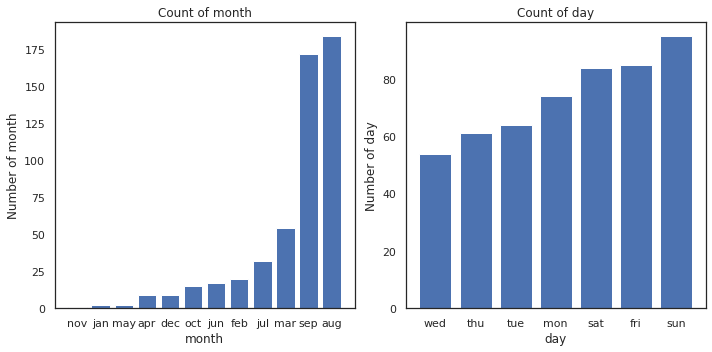

In [ ]:
plt.figure(figsize=(10, 5))
for idx, column in enumerate(categorical_feature):
    df = df.copy()
    unique = df[column].value_counts(ascending=True);

    plt.subplot(1, 2, idx+1)
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);

    plt.xlabel(column)
    plt.ylabel("Number of "+ column)

plt.tight_layout()
plt.show()

PairPlot Relation

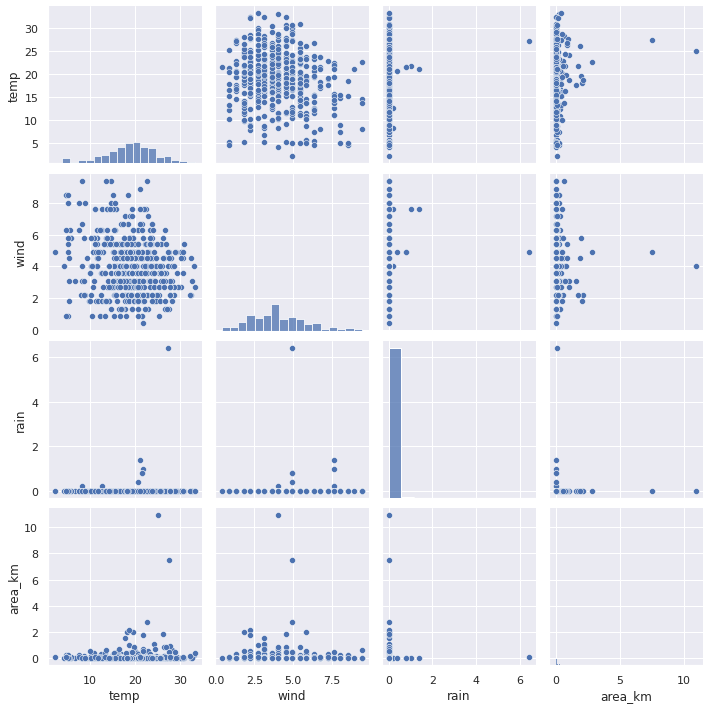

In [ ]:
sns.set_style('darkgrid')

sns.pairplot(df[["temp", "wind", "rain", "area_km"]])
plt.show()

Heat map

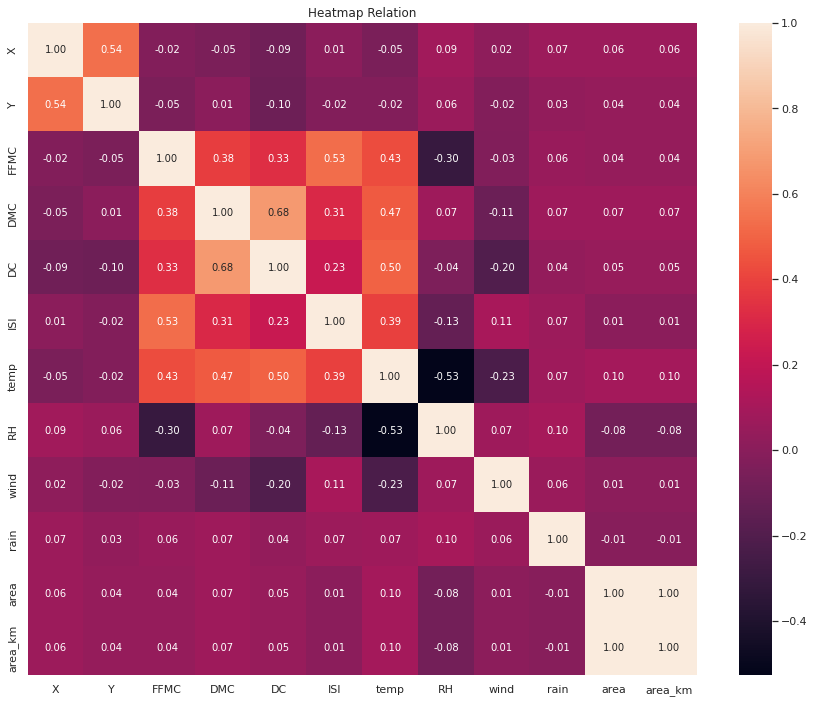

In [ ]:
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(df[numerical_feature].corr(), annot=True, fmt='.2f')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



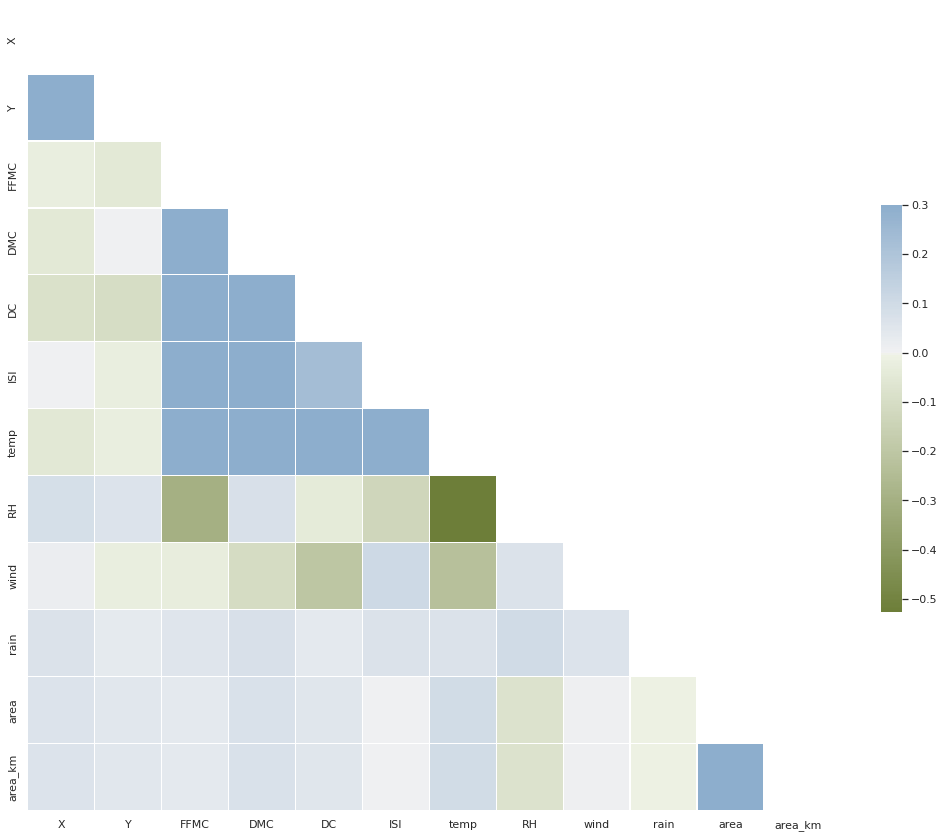

In [ ]:
import seaborn as sns
## Correlation Matrix
#set -Set the aesthetic style of the plots. the parameters are style and rc basically make the backgroud
#style is the kind of plot we will get it can changed to dark,ticks,whitegrid etc also its kind of a dictionary
#rc- Parameter mappings to override the values in the preset seaborn style dictionaries.
#This only updates parameters that are considered part of the style definition.
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#Return an array of zeros with the same shape and type as a given array.
mask[np.triu_indices_from(mask)] = True
# go through this https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.triu_indices_from.html

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 245, as_cmap=True)#visit for more details: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
#cmap is short for colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Comparing X and Y area_km wise

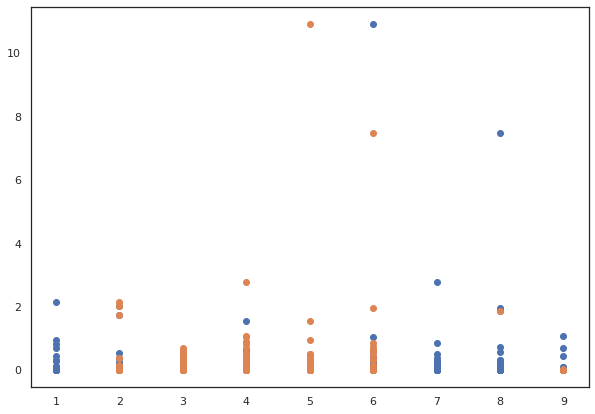

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(df['X'], df['area_km'])
plt.scatter(df['Y'], df['area_km'])


plt.show()

Highest rain in month and day wise

In [ ]:
highest_rain = df.sort_values(by='rain', ascending=False)[['month', 'day', 'rain']].head()
highest_rain

,month,day,rain
499,aug,tue,6.4
509,aug,fri,1.4
243,aug,sun,1.0
500,aug,tue,0.8
501,aug,tue,0.8


Highest and lowest temperature in month and day wise

In [ ]:
highest_temp = df.sort_values(by='temp', ascending=False)[['month', 'day', 'temp']].head()
highest_temp

,month,day,temp
498,aug,tue,33.3
484,aug,sun,33.1
496,aug,mon,32.6
492,aug,fri,32.4
491,aug,thu,32.4


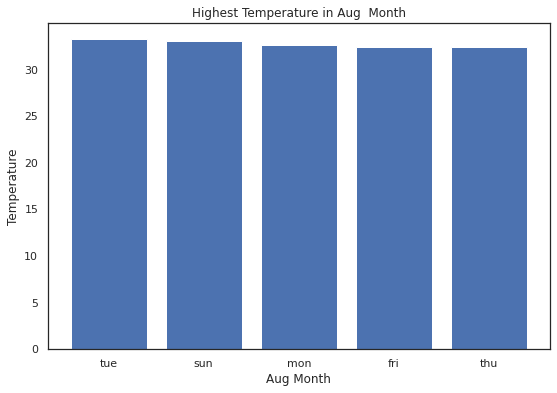

In [ ]:
plt.figure(figsize=(9, 6))

plt.title("Highest Temperature in Aug  Month")

plt.bar(highest_temp['day'], highest_temp['temp'])

plt.xlabel("Day")
plt.xlabel("Aug Month")


plt.ylabel("Temperature")
plt.show()

In [ ]:
lowest_temp =  df.sort_values(by='temp', ascending=True)[['month', 'day', 'temp']].head()
lowest_temp

,month,day,temp
280,dec,fri,2.2
282,feb,sun,4.2
279,dec,mon,4.6
278,dec,mon,4.6
277,dec,mon,4.6


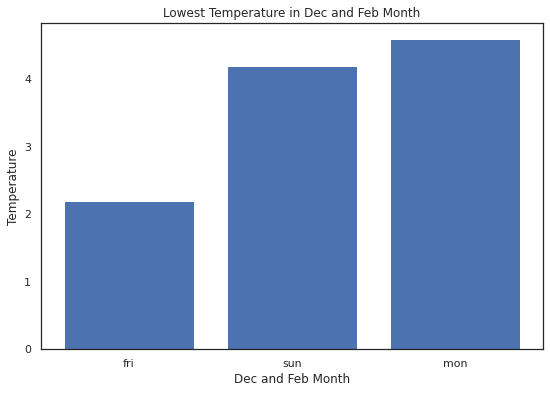

In [ ]:
plt.figure(figsize=(9, 6))

plt.title("Lowest Temperature in Dec and Feb Month")

plt.bar(lowest_temp['day'], lowest_temp['temp'])

plt.xlabel("Day")
plt.xlabel("Dec and Feb Month")

plt.ylabel("Temperature")

plt.show()

In [ ]:
import plotly.express as px

In [ ]:
px.bar(df, 'month', 'area_km', color='day', title='Total Forest Fires by month')

In [ ]:
px.bar(df, 'rain', 'area_km', color='month', title='Total Forest Fires by rain')

In [ ]:
px.line(df, 'rain', 'area_km', color='month', title='Total rain by month')

In [ ]:
px.bar(df, 'temp', 'area_km', color='month', title='Total Forest Fires by temp')

In [ ]:
px.bar(df, 'RH', 'area_km', color='month', title='Total Forest Fires by RH')

In [ ]:
px.bar(df, 'wind', 'area_km', color='month', title='Total Forest Fires by wind')

In [ ]:
px.line(df, 'day', 'area_km', color='month', title='Total Forest Fires by month')

In [ ]:
temp = df.groupby(by='month')['area_km'].sum().sort_values().reset_index()
px.bar(temp.tail(), 'month', 'area_km', color='month', title = 'month with most recorded forest fires')

In [ ]:
highest_rain = df.groupby(by='month')['area_km'].sum().sort_values().reset_index()
px.bar(temp.tail(), 'month', 'area_km', color='area_km', title = 'month with most recorded rainfall')

Data encoding

In [ ]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X        517 non-null    int64  
 1   Y        517 non-null    int64  
 2   month    517 non-null    int64  
 3   day      517 non-null    int64  
 4   FFMC     517 non-null    float64
 5   DMC      517 non-null    float64
 6   DC       517 non-null    float64
 7   ISI      517 non-null    float64
 8   temp     517 non-null    float64
 9   RH       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
 13  area_km  517 non-null    float64
dtypes: float64(9), int64(5)
memory usage: 56.7 KB


In [ ]:
df.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.075519


Data Splitting

In [ ]:
X = df.drop('area_km', axis=1)

In [ ]:
y = df['area_km']

In [ ]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Model creation

In [ ]:
# Model 1 Linear Regression
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
rmse_nor = RMSE/(y.max() - y.min())

print("MAE: ", MAE,"\nMSE: ",MSE,"\nRMSE: ", RMSE, "\nRMSE_NOR :",rmse_nor)
results = pd.DataFrame([['LinearRegression',MAE,MSE,RMSE,rmse_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])
results

MAE:  3.552861019095736e-16 
MSE:  3.701547029934803e-31 
RMSE:  6.084034048174618e-16 
RMSE_NOR : 5.577384445174928e-17


,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,3.552861e-16,3.701547e-31,6.084034e-16,5.577384e-17


In [ ]:
# Model 2 Ridge
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
rmse_nor = RMSE/(y.max() - y.min())

print("MAE: ", MAE,"\nMSE: ",MSE,"\nRMSE: ", RMSE, "\nRMSE_NOR :",rmse_nor)
model_results = pd.DataFrame([['Ridge',MAE,MSE,RMSE,rmse_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])

model_results

MAE:  0.0005737357452737973 
MSE:  3.1236156929399184e-06 
RMSE:  0.0017673753684319352 
RMSE_NOR : 0.00016201967001869527


,model,MAE,MSE,RMSE,RMSE_NOR
0,Ridge,0.000574,0.000003,0.001767,0.000162


In [ ]:
results = results.append(model_results, ignore_index = True)
results

,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,3.552861e-16,3.701547e-31,6.084034e-16,5.577384e-17
1,Ridge,5.737357e-04,3.123616e-06,1.767375e-03,1.620197e-04


In [ ]:
# Model 3 Lasso
from sklearn.linear_model import Lasso

# define model
model = Lasso(alpha=1.0)
# fit model:training and testing
model.fit(X_train, y_train)
#evaluate model
y_pred = model.predict(X_test)
# calculating MAE, MSE, RMSE
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
rmse_nor = RMSE / (y.max() - y.min())

print("MAE: ", MAE,"\nMSE: ",MSE,"\nRMSE: ", RMSE, "\nRMSE_NOR :",rmse_nor)
model_results = pd.DataFrame([['Lasso',MAE,MSE,RMSE,rmse_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])

model_results

MAE:  0.19051975104765964 
MSE:  0.39623071023126866 
RMSE:  0.629468593522559 
RMSE_NOR : 0.05770494238591903


,model,MAE,MSE,RMSE,RMSE_NOR
0,Lasso,0.19052,0.396231,0.629469,0.057705


In [ ]:
results = results.append(model_results, ignore_index = True)
results

,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,3.552861e-16,3.701547e-31,6.084034e-16,5.577384e-17
1,Ridge,5.737357e-04,3.123616e-06,1.767375e-03,1.620197e-04
2,Lasso,1.905198e-01,3.962307e-01,6.294686e-01,5.770494e-02


In [ ]:
# Model 4 SVR Poly
from sklearn.svm import SVR
from sklearn import metrics
svr_poly = SVR(kernel = 'poly')

#training and testing
svr_poly.fit(X_train,y_train)
y_pred_poly = svr_poly.predict(X_test)

# calculating MAE, MSE, RMSE
mae_poly = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly = metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
rmse_poly_nor = rmse_poly / (y.max() - y.min())
print("MAE: ", mae_poly,"\nMSE: ",mse_poly,"\nRMSE: ", rmse_poly,"\nRMSE_NOR: ",rmse_poly_nor)

model_results = pd.DataFrame([['SVR-Poly',mae_poly,mse_poly,rmse_poly,rmse_poly_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])

model_results

MAE:  0.13084675370925167 
MSE:  0.19185905765752273 
RMSE:  0.4380171887694851 
RMSE_NOR:  0.040154118731389125


,model,MAE,MSE,RMSE,RMSE_NOR
0,SVR-Poly,0.130847,0.191859,0.438017,0.040154


In [ ]:
results= results.append(model_results, ignore_index = True)
results

,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,3.552861e-16,3.701547e-31,6.084034e-16,5.577384e-17
1,Ridge,5.737357e-04,3.123616e-06,1.767375e-03,1.620197e-04
2,Lasso,1.905198e-01,3.962307e-01,6.294686e-01,5.770494e-02
3,SVR-Poly,1.308468e-01,1.918591e-01,4.380172e-01,4.015412e-02


In [ ]:
# Model 5 SVR RBF

svr_rbf = SVR(kernel = 'rbf')

# training and testing
svr_rbf.fit(X_train,y_train)
y_pred_rbf = svr_rbf.predict(X_test)

# calculating MAE, MSE, RMSE , RMSE_NOR
mae_rbf = metrics.mean_absolute_error(y_test, y_pred_rbf)
mse_rbf = metrics.mean_squared_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(mse_rbf)
rmse_rbf_nor = rmse_rbf / (y.max() - y.min())

print("MAE: ", mae_rbf,"\nMSE: ",mse_rbf,"\nRMSE: ", rmse_rbf,"\nRMSE_NOR :",rmse_rbf_nor)
model_results = pd.DataFrame([['SVR-rbf',mae_rbf,mse_rbf,rmse_rbf,rmse_rbf_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])


model_results

MAE:  0.13223482196661437 
MSE:  0.33347381014724214 
RMSE:  0.5774719128643766 
RMSE_NOR : 0.05293827810351442


,model,MAE,MSE,RMSE,RMSE_NOR
0,SVR-rbf,0.132235,0.333474,0.577472,0.052938


In [ ]:
results = results.append(model_results, ignore_index = True)
results

,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,3.552861e-16,3.701547e-31,6.084034e-16,5.577384e-17
1,Ridge,5.737357e-04,3.123616e-06,1.767375e-03,1.620197e-04
2,Lasso,1.905198e-01,3.962307e-01,6.294686e-01,5.770494e-02
3,SVR-Poly,1.308468e-01,1.918591e-01,4.380172e-01,4.015412e-02
4,SVR-rbf,1.322348e-01,3.334738e-01,5.774719e-01,5.293828e-02


In [ ]:
# Model 6 GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

# Training and Testing
y_pred = reg.predict(X_test)

# Calculating MAE,MSE,RMSE,RMSE_nor
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
rmse_nor = RMSE/ (y.max() - y.min())

print("MAE: ", MAE,"\nMSE: ",MSE,"\nRMSE: ", RMSE, "\nRMSE_NOR :",rmse_nor)
model_results = pd.DataFrame([['GBR',MAE,MSE,RMSE,rmse_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])
model_results

MAE:  0.026058830016179677 
MSE:  0.07391280099026959 
RMSE:  0.27186908796380216 
RMSE_NOR : 0.024922911514411113


,model,MAE,MSE,RMSE,RMSE_NOR
0,GBR,0.026059,0.073913,0.271869,0.024923


In [ ]:
results = results.append(model_results, ignore_index = True)
results

,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,3.552861e-16,3.701547e-31,6.084034e-16,5.577384e-17
1,Ridge,5.737357e-04,3.123616e-06,1.767375e-03,1.620197e-04
2,Lasso,1.905198e-01,3.962307e-01,6.294686e-01,5.770494e-02
3,SVR-Poly,1.308468e-01,1.918591e-01,4.380172e-01,4.015412e-02
4,SVR-rbf,1.322348e-01,3.334738e-01,5.774719e-01,5.293828e-02
5,GBR,2.605883e-02,7.391280e-02,2.718691e-01,2.492291e-02


Visualization of comparing test results

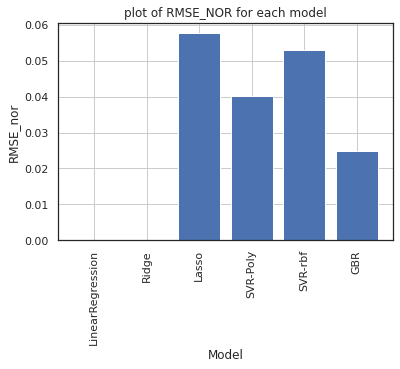

In [ ]:
plt.bar(results['model'],results['RMSE_NOR'])
plt.xlabel('Model')
plt.xticks(rotation ='vertical')
plt.ylabel('RMSE_nor')
plt.title('plot of RMSE_NOR for each model')
plt.grid(True)
plt.show()

Checking Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X= X_train, y = y_train,
                             cv = 10)
print("Ridge Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Ridge Accuracy: 0.93 (+/- 0.39)
